# Confidence Intervals with Python

In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import session_info

## Requirements

In [2]:
session_info.show()

## Generate artificial data

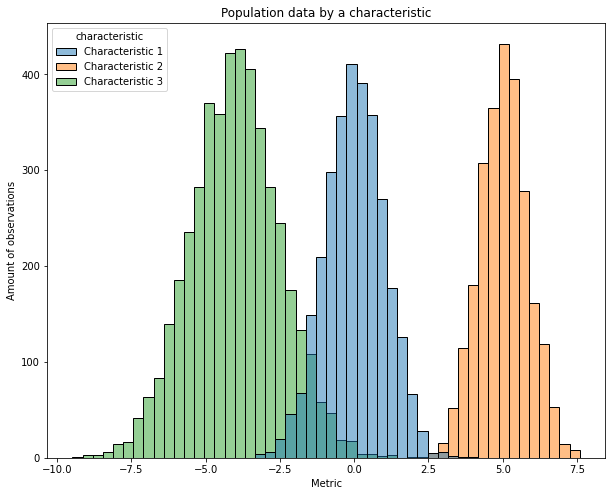

In [3]:
np.random.seed(1)

pop1_size = 3000
pop2_size = 2500
pop3_size = 4500

pop1 = np.concatenate((np.full(shape=(pop1_size, 1), fill_value='Characteristic 1'), np.random.normal(size=(pop1_size, 1))), axis=1)
pop2 = np.concatenate((np.full(shape=(pop2_size, 1), fill_value='Characteristic 2'), np.random.normal(loc=5, scale=0.8, size=(pop2_size, 1))), axis=1)
pop3 = np.concatenate((np.full(shape=(pop3_size, 1), fill_value='Characteristic 3'), np.random.normal(loc=-4, scale=1.5, size=(pop3_size, 1))), axis=1)

data = pd.DataFrame(np.concatenate((pop1, pop2, pop3)),
                    columns=['characteristic', 'val'],) 
data['val'] = data['val'].astype(np.float64)

fig, ax = plt.subplots(figsize=(10, 8))
sns.histplot(data=data, x='val', hue='characteristic', bins=50)
ax.set_ylabel('Amount of observations')
ax.set_xlabel('Metric')
ax.set_title('Population data by a characteristic')
plt.show()

## Z-statistic (Known Population Std)

In [4]:
np.random.seed(1)
sample_size = 100
sample = np.random.choice(data['val'], size=sample_size)
sample_mean = sample.mean()

pop_std = data['val'].std()

# 95% confidence interval
critical_z = scipy.stats.norm.ppf(q=0.975) # Two-tailed distribution, i.e. 2.5% for each tail

# Margin of error
error = critical_z * pop_std / np.sqrt(sample_size)

# Confidence interval
upper_ci = round(sample_mean + error, 3)
lower_ci = round(sample_mean - error, 3)

print(f'With 95% confidence the population mean falls between {lower_ci} and {upper_ci}')
print(f'The population mean is {round(data.mean(), 3)}')

With 95% confidence the population mean falls between -0.908 and 0.595
The population mean is val   -0.542
dtype: float64


C:\Users\breno.i.santos\AppData\Local\Temp\ipykernel_24240\3869561599.py:19: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(f'The population mean is {round(data.mean(), 3)}')


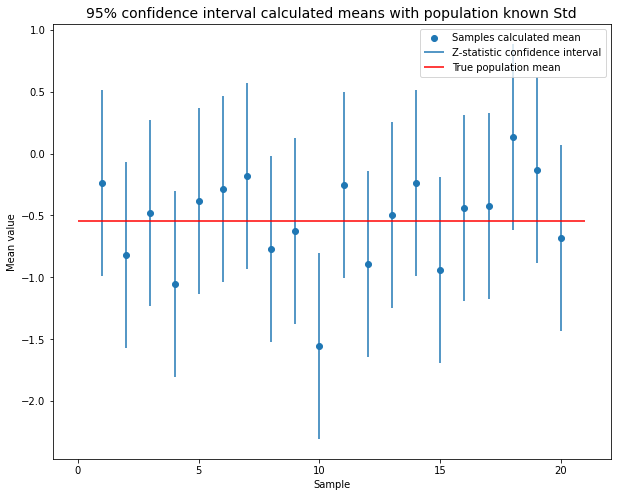

In [5]:
np.random.seed(1)
n_samples = 20
sample_size = 100

# Known population std
pop_std = data['val'].std()

# 95% confidence interval
critical_z = scipy.stats.norm.ppf(q=0.975,) # Two-tailed distribution, i.e. 2.5% for each tail

means = []
errors_bars = []
conf_intervals = []
for _ in range(n_samples):
    sample = np.random.choice(data['val'], size=sample_size, replace=False)
    sample_mean = sample.mean()
    sample_std = sample.std()
    means.append(sample_mean)
    
    # Margin of error
    error = critical_z * pop_std / np.sqrt(sample_size)
    # Error bars
    # errors_bars.append(error)
    
    # Confidence interval
    upper_ci = round(sample_mean + error, 3)
    lower_ci = round(sample_mean - error, 3)
    
    conf_intervals.append([lower_ci, upper_ci])
    
# Plot the samples confidence intervals
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the calculated means for each sample
plt.scatter(x=range(1, n_samples+1),
            y=means, 
            label='Samples calculated mean')

# Plot confidence interval
# Ploting on all
for i in range(1, n_samples):
    plt.vlines(x=i,
               ymin=conf_intervals[i-1][0],
               ymax=conf_intervals[i-1][1],)
plt.vlines(x=n_samples,
           ymin=conf_intervals[-1][0],
           ymax=conf_intervals[-1][1],
           label='Z-statistic confidence interval')

# Plot the true population mean
plt.hlines(y=data['val'].mean(),
           xmin=0,
           xmax=n_samples+1,
           color='red',
           label='True population mean')

plt.legend()
plt.title(f'95% confidence interval calculated means with population known Std', fontsize=14)
plt.xlabel('Sample')
plt.ylabel('Mean value')

plt.show()

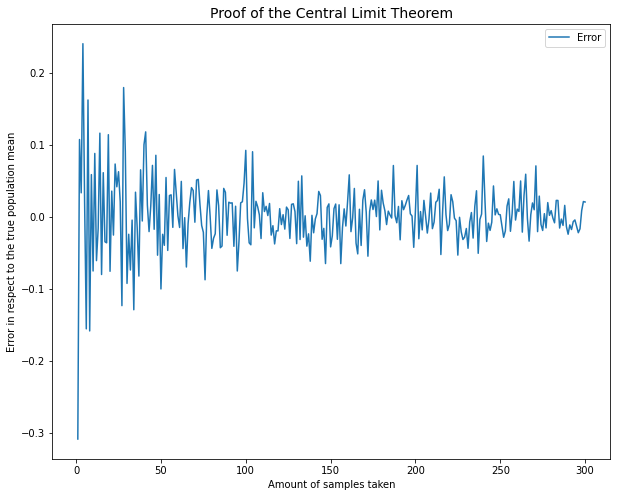

In [6]:
np.random.seed(1)
n_samples = 300
sample_size = 100
pop_mean = data['val'].mean()
means = []
error = []
for n in range(1, n_samples+1):
    # For every n experiment get the samples' mean
    samples_means = []
    for _ in range(n):
        sample = np.random.choice(data['val'], size=sample_size, replace=False)
        samples_means.append(sample.mean())
    
    # Compute the samples means mean
    means.append(np.array(samples_means).mean())
    
    # Compute the error in respect to the actual mean
    error.append(pop_mean - means[-1])
        
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the errors
plt.plot(range(1, n_samples + 1),
         error, 
         label='Error')
plt.xlabel('Amount of samples taken')
plt.ylabel('Error in respect to the true population mean')
plt.title('Proof of the Central Limit Theorem', fontsize=14)
plt.legend()
plt.show()

The more samples we take from the population the closer we get to the true population mean.

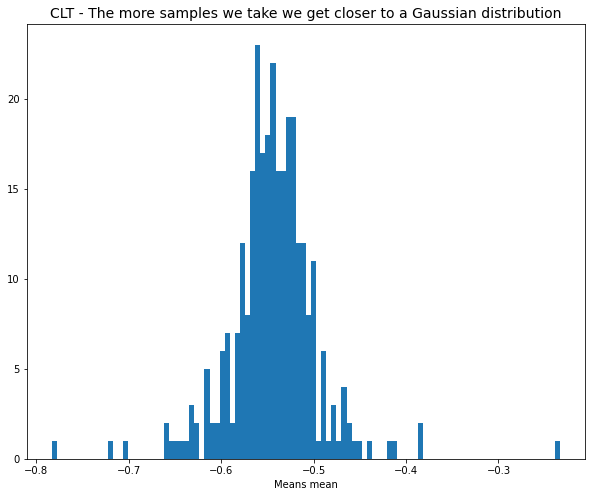

In [7]:
fig, ax = plt.subplots(figsize=(10, 8))
plt.hist(means, bins=100)
plt.xlabel('Means mean')
plt.title('CLT - The more samples we take we get closer to a Gaussian distribution', fontsize=14)
plt.show()

## T-Statistic (Unknown Population Std)

In [8]:
np.random.seed(1)
sample_size = 25
sample = np.random.choice(data['val'], size=sample_size)
sample_mean = sample.mean()

# 95% confidence interval
critical_t = scipy.stats.t.ppf(q=0.975, # Two-tailed distribution, i.e. 2.5% for each tail
                               df=sample_size-1,) # Degrees of freedom

# Sample std
sample_std = sample.std()

# Margin of error
error = critical_t * sample_std / np.sqrt(sample_size)

# Confidence interval
upper_ci = round(sample_mean + error, 3)
lower_ci = round(sample_mean - error, 3)

print(f'With 95% confidence the population mean falls between {lower_ci} and {upper_ci}')
print(f'The population mean is {round(data["val"].mean(), 3)}')

With 95% confidence the population mean falls between -1.065 and 2.088
The population mean is -0.542


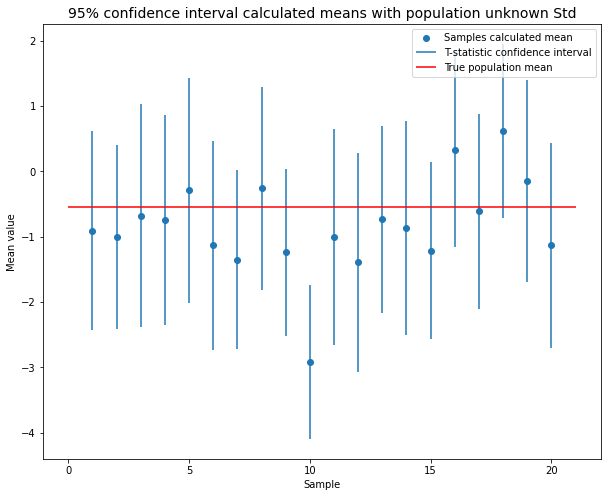

In [9]:
np.random.seed(1)
n_samples = 20
sample_size = 25

# 95% confidence interval
critical_t = scipy.stats.t.ppf(q=0.975, df=sample_size-1) # Two-tailed distribution, i.e. 2.5% for each tail

means = []
errors_bars = []
conf_intervals = []
for _ in range(n_samples):
    sample = np.random.choice(data['val'], size=sample_size, replace=False)
    sample_mean = sample.mean()
    sample_std = sample.std()
    means.append(sample_mean)
    
    # Margin of error
    error = critical_t * sample_std / np.sqrt(sample_size)
    # Error bars
    # errors_bars.append(error)
    
    # Confidence interval
    upper_ci = round(sample_mean + error, 3)
    lower_ci = round(sample_mean - error, 3)
    
    conf_intervals.append([lower_ci, upper_ci])
    
# Plot the samples confidence intervals
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the calculated means for each sample
plt.scatter(x=range(1, n_samples+1),
            y=means, 
            label='Samples calculated mean')

# Plot confidence interval
# Ploting on all
for i in range(1, n_samples):
    plt.vlines(x=i,
               ymin=conf_intervals[i-1][0],
               ymax=conf_intervals[i-1][1],)
plt.vlines(x=n_samples,
           ymin=conf_intervals[-1][0],
           ymax=conf_intervals[-1][1],
           label='T-statistic confidence interval')

# Plot the true population mean
plt.hlines(y=data['val'].mean(),
           xmin=0,
           xmax=n_samples+1,
           color='red',
           label='True population mean')

plt.legend()
plt.title(f'95% confidence interval calculated means with population unknown Std', fontsize=14)
plt.xlabel('Sample')
plt.ylabel('Mean value')

plt.show()